# <center> Numerical methods and applications for<br><br> Elliptic Partial Differential Equations I.</center>



#### <center>Dr. Gábor Maros</center>

### <center>Department of Applied Analysis and Computational Mathematics</center>

### General information:
+ Contact: Teams Group
+ All of the course material can be found at the Teams Channel

### Evaluation:

.....

### Literature:
+ <a href="https://web.cs.elte.hu/~karatson/ellnumo-ang.html">Lecture Notes</a> provided by Prof. János Karátson
<br>

+ Recommended and Further literature
    + William L. Briggs, Van Emden Henson, and Steve F. McCormick: A multigrid tutorial
    + A.J.M. Ferreira: MATLAB Codes for Finite Element Analysis, Solids and Structures
    + Uri M. Ascher , Robert M. M. Mattheij, and Robert D. Russell: Numerical Solution of Boundary Value Problems for Ordinary Differential Equations




## <center>Introduction</center>


### Motivation and theoretical background in a nutshell
<br>
Mathematical models of physical phenomena where we neglect the time variable (steady state).

<br>
Let's start with the classical heat conduction (thermal conduction) model
$$c\rho \frac{\partial u}{\partial t}=\mathrm{div}(k\mathrm{grad}u)+f(x),$$

where 
+ $u$ is the temperature
+ $\rho$ is the density of heat conductivity media
+ $k$ is the material's heat conductivity
+ $f$ is the heat sources' density. 

<br>

What is going to happen if variable $u$ is independent of time variable $t$? We will have steady state, i.e.

$$0=\mathrm{div}(k\mathrm{grad}u)+f(x)$$

Potential physical meanings: <br>

(a) Flow of a fluid through a porous medium (<a href="https://en.wikipedia.org/wiki/Darcy%27s_law" target="_blank">Darcy's law</a>)<br>
(b) Governing the transport of mass through diffusive means (<a href="https://en.wikipedia.org/wiki/Fick%27s_laws_of_diffusion" target="_blank">Fick's law</a>)<br><br>

An important special case of (b) when $k=const$. This is the most basic elliptic equation the so-called <i>Poisson equation</i>
<br><br>

$$\Delta u+f(x)=0$$

If $f=0$ then it is called <i>Laplace equation</i>. The above equation has more physical meanings. If $k$ is the dielectric constant, $f$ is the charge density, then $u$ gives the potential of the electrostatic field. It is the reason why sometimes the equation is also called <i>potential equation</i>.
<br>
<br>
Our last example is when we can model twisting thin rods by using the Poisson equation

$$\Delta \Phi=-1,\quad (x_1,x_2)\in\Omega,\quad \Phi|_{\Gamma}=0,$$

where 
+ $\Omega$ is the cross section of the rod
+ $\Gamma$ is the boundary of $\Omega$ 
+ $\Phi$ is the auxiliary function
<br>

<br>
Further technical details regarding the theoretical background is presented during the lectures.
<br>

## <center>Problem Sheet #1</center>
### Two-point Boundary Value Problems (BVPs) in 1D
<br>
<br>

#### Discretizations and Dirichlet boundary condition
<br>

<b>Problem 1.</b> Consider the following two-point BVP

\begin{cases}
-u''(x)=1,\quad x\in(0,\pi/4)\\
u(0)=1\\
u(\pi/4)=2
\end{cases}

(a) Apply the standard second order finite difference scheme for the second derivative. Make a plot about the numerical and the true solutions.

<br>


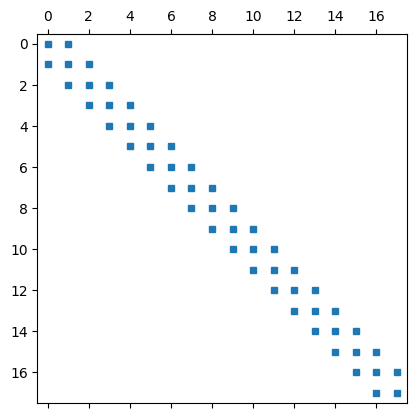

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags

# Parameters
a = 0
b = np.pi / 4  # interval
alpha = 1
beta = 2       # boundary values
N = 16
h = (b - a) / (N + 1)

# Create sparse matrix A_h using scipy.sparse.diags
e = np.ones(N + 2)
A_h = diags([-e, 2*e, -e], offsets=[-1, 0, 1], shape=(N+2, N+2)) * (1 / h**2)

# Plot sparsity pattern (like spy in MATLAB)
plt.spy(A_h, markersize=5)
plt.show()

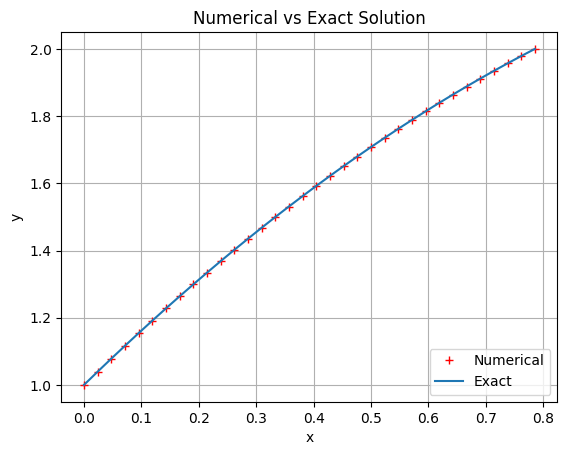

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.sparse import lil_matrix
from scipy.sparse.linalg import spsolve

# Parameters
a = 0
b = np.pi / 4
alpha = 1
beta = 2

# Grid
N = 32
h = (b - a) / (N + 1)

# A_h construction
e = np.ones(N + 2)
A_h = diags([-e, 2*e, -e], offsets=[-1, 0, 1], shape=(N + 2, N + 2))/h**2
A_h = A_h.tolil()  # Convert to LIL to allow assignment


# Apply Dirichlet boundary conditions
....

# Convert back to CSR for efficient solving
A_h = A_h.tocsr()

# Right-hand side function f
....

# Solve system
y = spsolve(A_h, f)  

# Grid points
x = np.linspace(a, b, N + 2)

# Exact solution
exact = -0.5 * x**2 + (4 / np.pi + np.pi / 8) * x + 1

# Plot
plt.plot(x, y, 'r+', label='Numerical')
plt.plot(x, exact, label='Exact')
plt.legend(loc='lower right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Numerical vs Exact Solution')
plt.grid(True)
plt.show()

<br>
(b) Modify the previous code in the sense of reduced system.
<br>

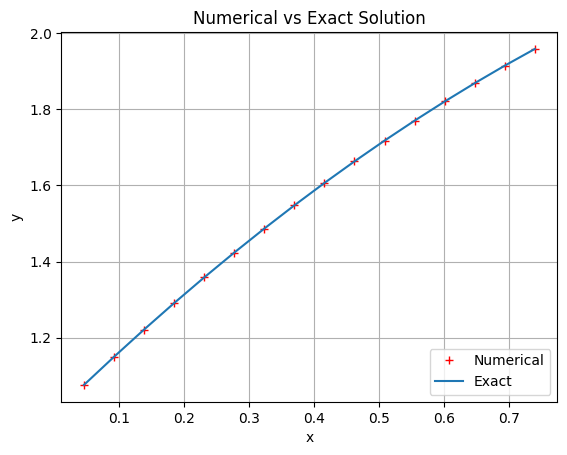

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve

# Parameters
a = 0
b = np.pi / 4
alpha = 1
beta = 2

# Grid
N = 16
h = (b - a) / (N + 1)

# Construct A_h using diags
e = np.ones(N)
A_h = diags([-e, 2*e, -e], offsets=[-1, 0, 1], shape=(N , N )) * (1 / h**2)
A_h = A_h.tocsr()
# Right-hand side function f
....

# Solve system numerically
y = spsolve(A_h, f)

# Grid points (interior points)
x = np.linspace(a + h, b - h, N)

# Exact solution
exact = -0.5 * x**2 + (4 / np.pi + np.pi / 8) * x + 1

# Plot results
plt.plot(x, y, 'r+', label='Numerical')
plt.plot(x, exact, label='Exact')
plt.legend(loc='lower right')  # Python equivalent of MATLAB 'southeast'
plt.xlabel('x')
plt.ylabel('y')
plt.title('Numerical vs Exact Solution')
plt.grid(True)
plt.show()

<b>Problem 3.</b> Consider the following two-point BVP


\begin{cases}
u''(x)-u(x)=0,\quad x\in(0,1)\\
u(0)=0\\
u(1)=1
\end{cases}

(a) Apply the techniques from Problem 1. Measure the global error in the maximum norm, 1-norm and 2-norm, using that the exact solution is $u(x)=\sinh(x) /\sinh(1)$! What can we experience by increasing the number of the subintervals?

Max norm (inf): 0.0000002657248310
L1 norm: 0.0000001724868385
L2 norm: 0.0000001904843204


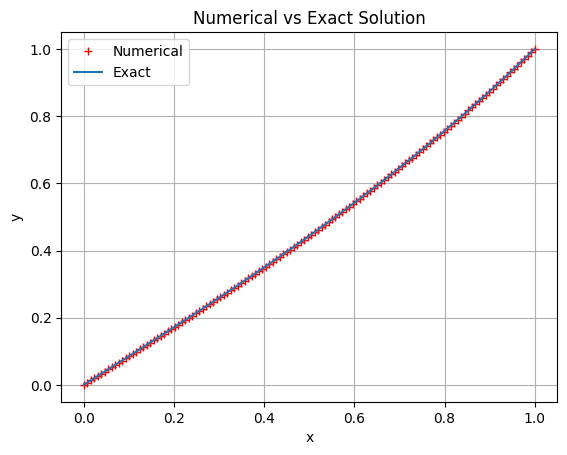

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.sparse import lil_matrix
from scipy.sparse.linalg import spsolve

# Parameters
a = 0
b = 1
alpha = 0
beta = 1

# Grid
N = 128
h = (b - a) / (N + 1)

# Construct A_h for -u'' + u = 0
e = np.ones(N + 2)
A_h = ....
A_h = A_h.tolil()  # Convert to LIL for assignment

# Apply Dirichlet boundary conditions
A_h[0, 1] = 0
A_h[0, 0] = 1
A_h[-1, -2] = 0
A_h[-1, -1] = 1
A_h=A_h/h**2
# Convert back to CSR for efficient solving
A_h = A_h.tocsr()

# Right-hand side
f = np.zeros(N + 2)
f[0] = alpha/h**2
f[-1] = beta/h**2

# Solve system
y = spsolve(A_h, f)

# Grid points
x = np.linspace(a, b, N + 2)

# Exact solution
exact = np.sinh(x) / np.sinh(1)

# Compute norms
norm_max = np.max(np.abs(y - exact))
norm_1 = h * np.sum(np.abs(y - exact))
norm_2 = np.sqrt(h * np.sum(np.abs(y - exact)**2))

print(f"Max norm (inf): {norm_max:.16f}")
print(f"L1 norm: {norm_1:.16f}")
print(f"L2 norm: {norm_2:.16f}")

# Plot
plt.plot(x, y, 'r+', label='Numerical')
plt.plot(x, exact, label='Exact')
plt.legend(loc='upper left')  # equivalent to MATLAB 'northwest'
plt.xlabel('x')
plt.ylabel('y')
plt.title('Numerical vs Exact Solution')
plt.grid(True)
plt.show()

(b) [Assignment]  Modify the previous code in the sense of reduced system.

Max norm (inf): 0.0000152940269769
L1 norm: 0.0000098928520388
L2 norm: 0.0000109635381788


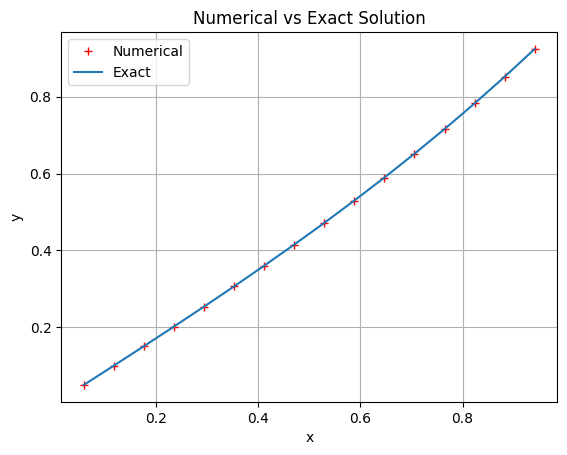

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags_array
from scipy.sparse.linalg import spsolve

# Parameters
a = 0
b = 1
alpha = 0
beta = 1

# Grid
N = 16
h = (b - a) / (N + 1)

# Construct A_h for -u'' + u = 0 (interior points)
e = np.ones(N)
A_h = diags_array([e, -2*e - h**2*e, e], offsets=[-1, 0, 1], shape=(N, N))/h**2

# Right-hand side function f (interior points)
f = np.zeros(N)
f[0] = -alpha / h**2
f[-1] = -beta / h**2

# Solve system
y = spsolve(A_h.tocsr(), f)  # Convert to CSR for spsolve

# Grid points (interior)
x = np.linspace(a + h, b - h, N)

# Exact solution
exact = np.sinh(x) / np.sinh(1)

# Norms
norm_max = np.max(np.abs(y - exact))
norm_1 = h * np.sum(np.abs(y - exact))
norm_2 = np.sqrt(h * np.sum(np.abs(y - exact)**2))

print(f"Max norm (inf): {norm_max:.16f}")
print(f"L1 norm: {norm_1:.16f}")
print(f"L2 norm: {norm_2:.16f}")

# Plot
plt.plot(x, y, 'r+', label='Numerical')
plt.plot(x, exact, label='Exact')
plt.legend(loc='upper left')  # equivalent to MATLAB 'northwest'
plt.xlabel('x')
plt.ylabel('y')
plt.title('Numerical vs Exact Solution')
plt.grid(True)
plt.show()

#### Neumann boundary condition
<br>

<b>Problem 4.</b> Let us consider the following problem

\begin{cases}
u''(x)=e^x,\quad x\in(0,1)\\
u'(0)=1\\
u(1)=e
\end{cases}

(a) Let us apply the formula

$$\frac{y_1-y_0}{h}=\alpha$$

approximating the Neumann boundary condition. Measure the global error in the maximum norm. What can we experience? Plot the numerical and the true solutions in the same figure.

<br>
(b) [Assignment] Apply the formulas

$$\frac{y_1-y_0}{h}=\alpha+\frac{h}{2}f(x_0)$$

and

$$-\frac{\frac{3}{2}y_0-2y_1+\frac{1}{2}y_2}{h}=\alpha$$

approximating the Neumann boundary condition. Plot the numerical and the true solutions in the same figure.

Max norm (inf): 1.5359518490539736e-02


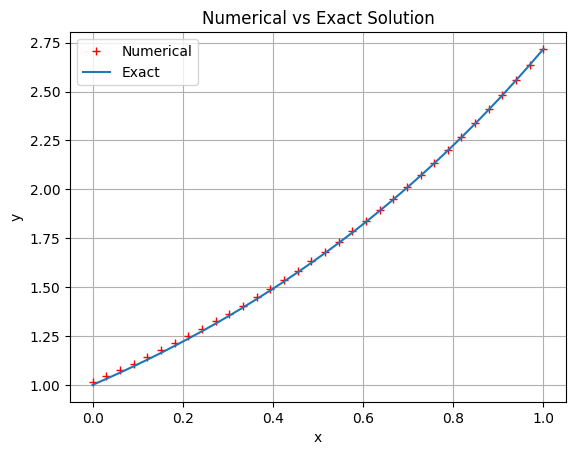

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.sparse import lil_matrix
from scipy.sparse.linalg import spsolve

# Parameters
a = 0
b = 1
alpha = 1
beta = np.exp(1)

# Grid
N = 32
h = (b - a) / (N + 1)

# Construct A_h
e = np.ones(N + 2)
A_h = diags([-e, 2*e, -e], offsets=[-1, 0, 1], shape=(N + 2, N + 2), format='lil') * (1/h**2)

# Modify for boundary conditions
....

# Right-hand side function
x = np.linspace(a, b, N + 2)
f = -np.exp(x)
f[0] = ....
f[-1] = beta

# Solve system
A_h = A_h.tocsr()  # Convert to CSR for efficient solving
y = spsolve(A_h, f)

# Exact solution
exact = np.exp(x)

# Norm
norm_max = np.max(np.abs(y - exact))
print(f"Max norm (inf): {norm_max:.16e}")

# Plot
plt.plot(x, y, 'r+', label='Numerical')
plt.plot(x, exact, label='Exact')
plt.legend(loc='upper left')  # MATLAB 'northwest'
plt.xlabel('x')
plt.ylabel('y')
plt.title('Numerical vs Exact Solution')
plt.grid(True)
plt.show()

Max norm (inf): 7.8371595250770199e-04


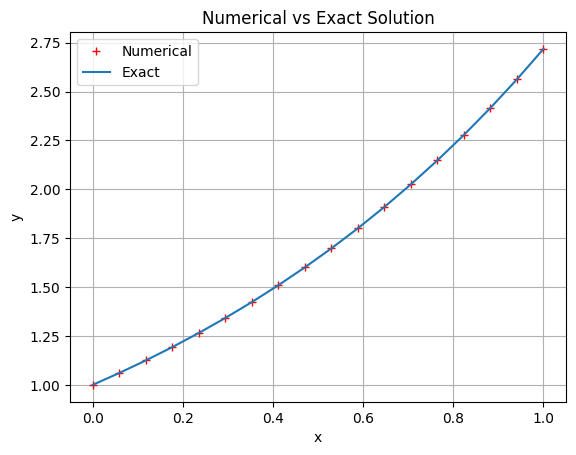

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.sparse import lil_matrix
from scipy.sparse.linalg import spsolve

# Parameters
a = 0
b = 1
alpha = 1
beta = np.exp(1)

# Grid
N = 16
h = (b - a) / (N + 1)

# Construct A_h
e = np.ones(N + 2)
A_h = diags([e, -2*e, e], offsets=[-1, 0, 1], shape=(N + 2, N + 2), format='lil') * (1/h**2)

# Boundary conditions
....

# Grid points
x = np.linspace(a, b, N + 2)

# Right-hand side function f
f = np.exp(x)
f[0] = .....  # modified left boundary
f[-1] = beta

# Solve system
A_h = A_h.tocsr()  # convert to CSR for spsolve
y = spsolve(A_h, f)

# Exact solution
exact = np.exp(x)

# Norm
norm_max = np.max(np.abs(y - exact))
print(f"Max norm (inf): {norm_max:.16e}")

# Plot
plt.plot(x, y, 'r+', label='Numerical')
plt.plot(x, exact, label='Exact')
plt.legend(loc='upper left')  # MATLAB 'northwest'
plt.xlabel('x')
plt.ylabel('y')
plt.title('Numerical vs Exact Solution')
plt.grid(True)
plt.show()

Max norm (inf): 6.5643666641523879e-05


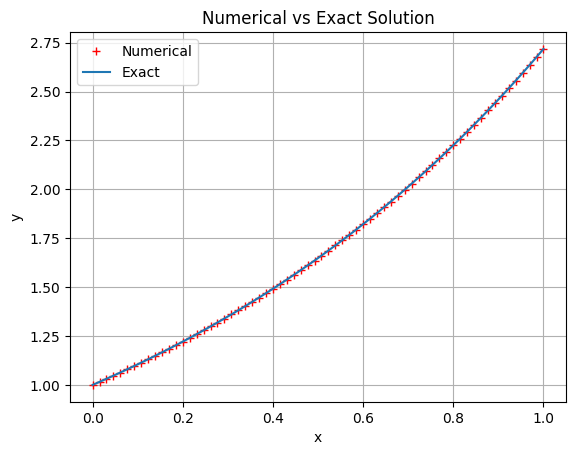

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags, lil_matrix
from scipy.sparse.linalg import spsolve

# Parameters
a = 0
b = 1
alpha = 1
beta = np.exp(1)

# Grid
N = 64
h = (b - a) / (N + 1)

# Construct A_h as tridiagonal
e = np.ones(N + 2)
A_h = diags([e, -2*e, e], offsets=[-1, 0, 1], shape=(N + 2, N + 2), format='lil') * (1/h**2)

# Left boundary: third-order forward difference approximation
.....

# Right boundary: Dirichlet
A_h[-1, -2] = 0
A_h[-1, -1] = 1

# Grid points
x = np.linspace(a, b, N + 2)

# Right-hand side function
f = np.exp(x)
f[0] = alpha  # modified for left boundary
f[-1] = beta  # Dirichlet at right boundary

# Solve system
A_h = A_h.tocsr()  # convert to CSR for spsolve
y = spsolve(A_h, f)

# Exact solution
exact = np.exp(x)

# Max norm
norm_max = np.max(np.abs(y - exact))
print(f"Max norm (inf): {norm_max:.16e}")

# Plot
plt.plot(x, y, 'r+', label='Numerical')
plt.plot(x, exact, label='Exact')
plt.legend(loc='upper left')  # MATLAB 'northwest'
plt.xlabel('x')
plt.ylabel('y')
plt.title('Numerical vs Exact Solution')
plt.grid(True)
plt.show()